In [1]:
import torch
import torch.nn as nn
import numpy as np
import numpy.random as rng

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [2]:
X = np.load('X.npy')
normalize_c = np.load('normalize_constant.npy')

In [4]:
X.shape

(100, 1000)

In [5]:
normalize_c

array(538.19347245)

In [6]:
import matplotlib.pyplot as plt

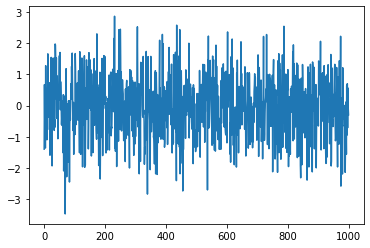

In [7]:
%matplotlib inline
plt.plot(X[0])

In [8]:
class MLP(nn.Module):
    def __init__(self, N, p):
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(N, 1024)
        self.fc2 = nn.Linear(1024, 2048)
        self.fc3 = nn.Linear(2048, 2048)
        self.fc4 = nn.Linear(2048, 1024)
        self.fc5 = nn.Linear(1024, p)
        self.relu = nn.ReLU()
        self.mseloss = nn.MSELoss()
        self.bceloss = nn.BCEWithLogitsLoss()

    def forward(self, input):
        u = self.relu(self.fc1(input))
        u = self.relu(self.fc2(u))
        u = self.relu(self.fc3(u))
        u = self.relu(self.fc4(u))
        output = self.fc5(u)
        return output

    def get_mseloss(self, data, targ):
        output = self.forward(data)
        loss = self.mseloss(output, targ)
        return loss

    def get_bceloss(self, data, targ):
        output = self.forward(data)
        loss = self.bceloss(output, targ)
        return loss

In [11]:
md = MLP(1100, 1000)
md.load_state_dict(torch.load("My_model.pt"))

<All keys matched successfully>

In [12]:
true_beta = np.zeros((1000,1))
true_beta[:4,0]=2

In [14]:
Y_obs = X @ true_beta + rng.randn(100, 1)
input = np.concatenate((Y_obs, X.T @ Y_obs), axis=0) / normalize_c

In [15]:
md.eval()

MLP(
  (fc1): Linear(in_features=1100, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=2048, bias=True)
  (fc3): Linear(in_features=2048, out_features=2048, bias=True)
  (fc4): Linear(in_features=2048, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=1000, bias=True)
  (relu): ReLU()
  (mseloss): MSELoss()
  (bceloss): BCEWithLogitsLoss()
)

In [16]:
input = torch.from_numpy(input.reshape(-1)).type(torch.float)
md(input)

tensor([ 1.6461e-01,  1.2921e-01,  1.1340e-01,  1.4973e-01, -5.9346e-02,
         6.3806e-03, -8.4820e-03, -2.3484e-02,  2.2883e-02, -8.0068e-03,
        -5.4731e-02, -4.8008e-02,  1.0876e-02, -5.3089e-03,  3.3234e-02,
        -1.4384e-02, -4.3330e-02,  2.0859e-02,  2.2043e-03,  1.0279e-02,
        -7.3409e-03, -1.3678e-02, -1.7812e-02, -6.9020e-03,  1.4211e-03,
        -1.4113e-02, -6.0531e-03, -3.1864e-02, -2.8655e-02, -3.8656e-02,
         2.4365e-02, -8.5527e-03,  1.2421e-02, -5.6918e-05, -7.8605e-04,
         6.4575e-02,  2.1454e-02,  9.7222e-02,  7.9977e-03, -4.7590e-02,
        -5.4910e-02,  6.7491e-02,  1.9487e-02,  7.0053e-02,  4.2323e-03,
         1.4934e-02,  1.7016e-02,  6.1508e-02, -1.2757e-02,  4.6149e-02,
         5.1495e-02,  2.4981e-02, -3.8168e-02,  4.0321e-02, -5.5439e-02,
        -2.3752e-02,  1.6420e-02,  6.0000e-02,  1.5992e-02,  3.5952e-03,
         1.7140e-02,  3.3302e-02, -8.4076e-03,  4.0302e-02,  3.3593e-02,
         3.4694e-02, -1.7986e-03,  1.8339e-02,  3.9

In [18]:
output = md(input).detach().numpy()

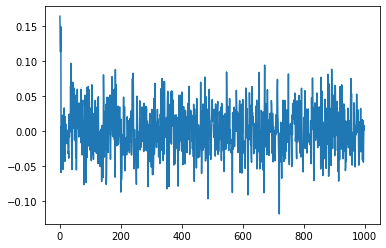

In [19]:
plt.plot(output)